In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amol07","key":"0a6c2730c610b7c3a98ea7471f3b5334"}'}

In [2]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d itssuru/loan-data

  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 45.5MB/s]


In [4]:
!unzip /content/loan-data.zip

Archive:  /content/loan-data.zip
  inflating: loan_data.csv           


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv('/content/loan-data.zip')

In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
df.value_counts('purpose')

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
dtype: int64

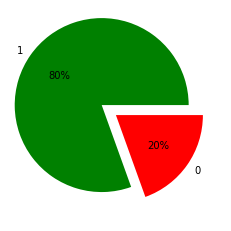

In [11]:
plt.pie(x=df.value_counts('credit.policy'), labels=[1,0], autopct="%1.0f%%", explode=[0.2, 0], colors=['g', 'r'])
plt.show()

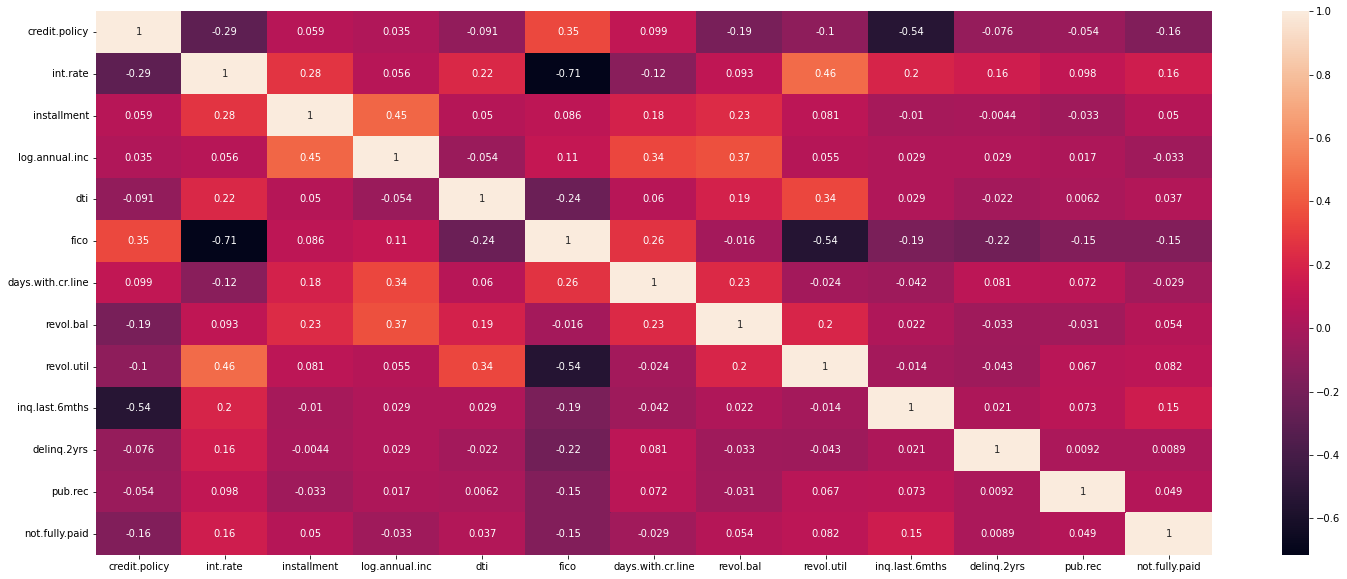

In [12]:
plt.figure(figsize = (25, 10))
sns.heatmap(df.corr(), annot= True)

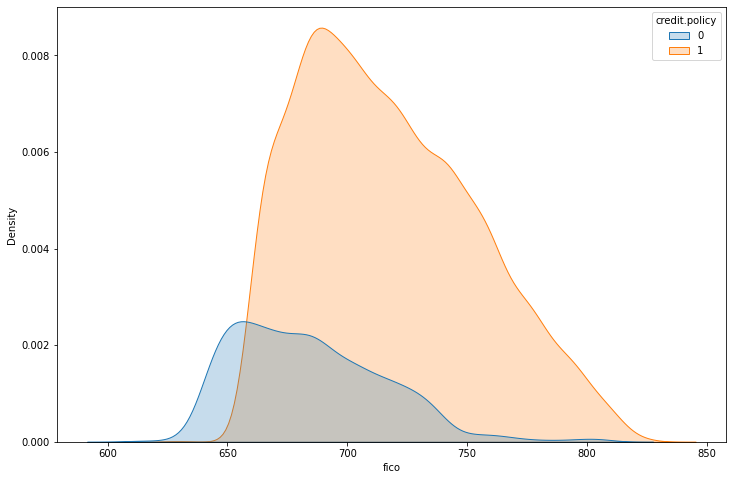

In [13]:
#Since Credit policy highly co-relate with fico
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='fico',hue="credit.policy", fill=True)

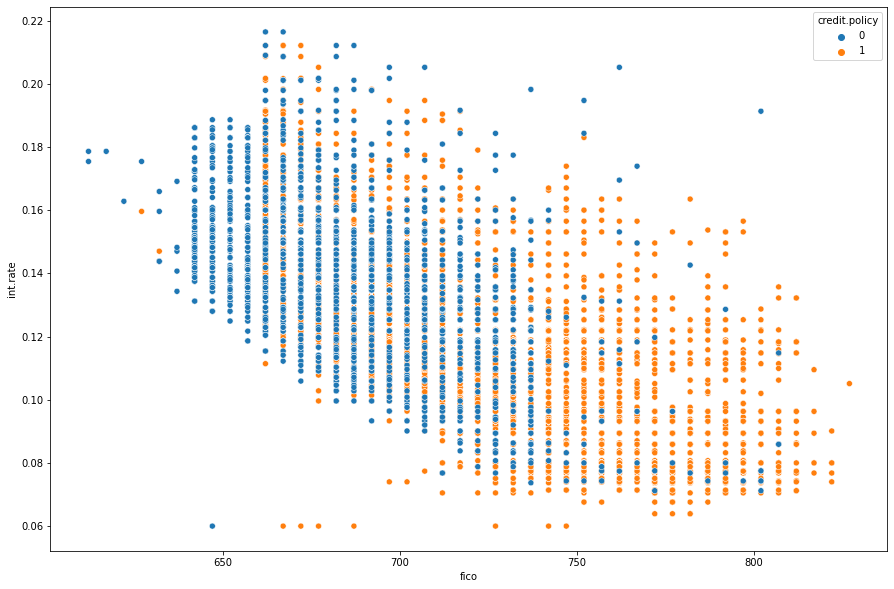

In [14]:
# negative corr of int rate and fico

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='fico', y='int.rate', hue='credit.policy')

In [15]:
traindf = df.drop(['credit.policy', 'purpose'], axis=1)
labels = df['credit.policy']

In [16]:
traindf.shape

(9578, 12)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
train_x, test_x, train_y, test_y = train_test_split(traindf, labels, train_size=0.8, random_state=69)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)

pred = rfc.predict(test_x)
print('Training Accuracy: ', rfc.score(train_x, train_y), '\n')
print(classification_report(test_y, pred))

Training Accuracy:  1.0 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       375
           1       0.99      1.00      0.99      1541

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916



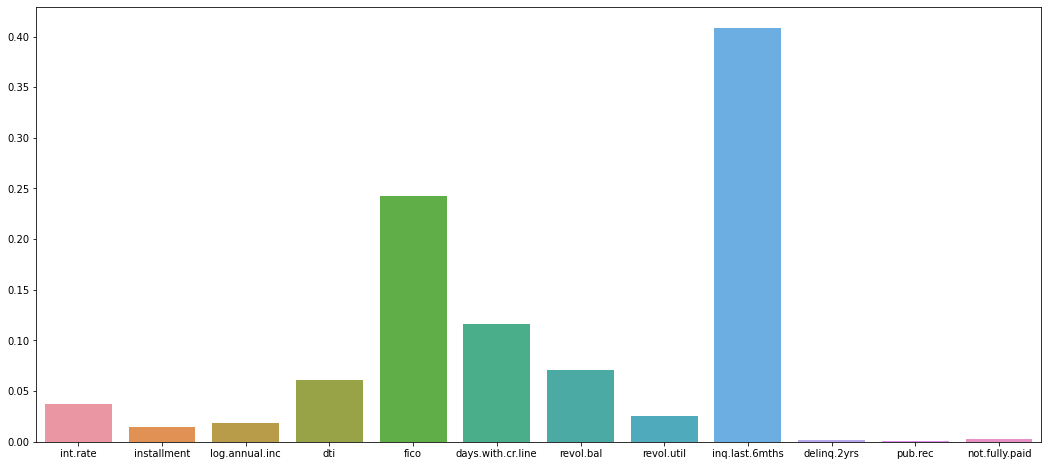

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(y=rfc.feature_importances_, x=rfc.feature_names_in_)

In [21]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(train_x, train_y)
pred = xgbc.predict(test_x)
print('Training Accuracy: ', xgbc.score(train_x, train_y), '\n')
print(classification_report(test_y, pred))

Training Accuracy:  0.991647089532759 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       375
           1       0.99      1.00      0.99      1541

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916



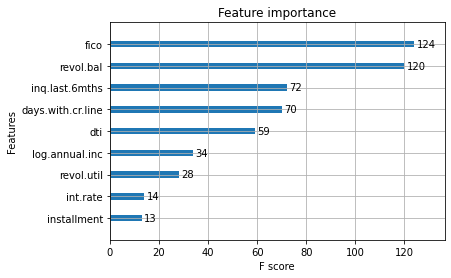

In [22]:
import xgboost as xbg
xbg.plot_importance(xgbc, height=0.3)

In [23]:
import lightgbm as lgbm

In [24]:
model = lgbm.LGBMClassifier(learning_rate=0.01, n_jobs=4, boosting_type='gbdt')
model.fit(train_x, train_y, eval_set=[(test_x, test_y), (train_x, train_y)], verbose=0, eval_metric='logloss')

LGBMClassifier(learning_rate=0.01, n_jobs=4)

In [25]:
print('Training accuracy {:.2f} % \n'.format(model.score(train_x,train_y)*100))
print(classification_report(test_y, pred))

Training accuracy 98.62 % 

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       375
           1       0.99      1.00      0.99      1541

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916



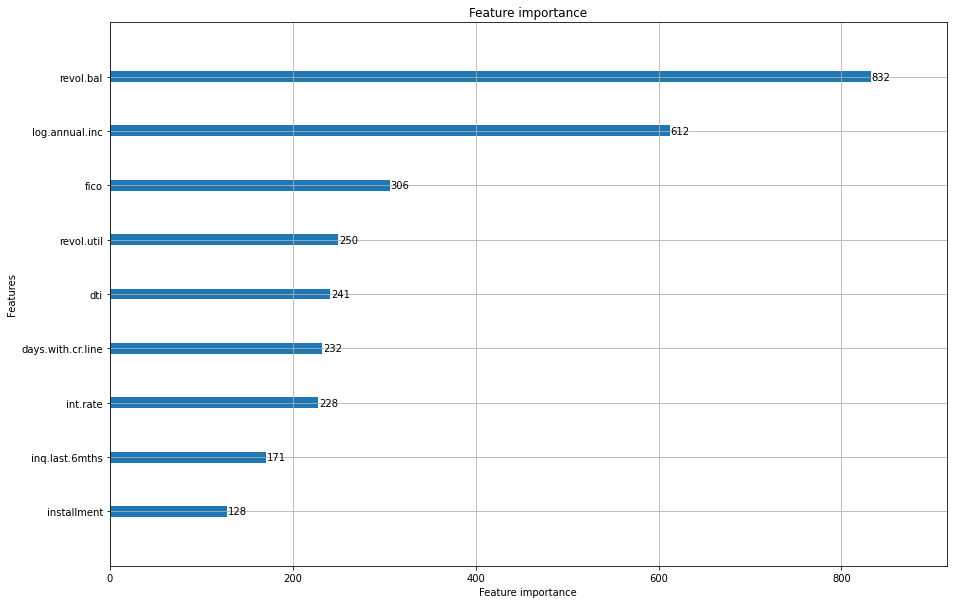

In [26]:
lgbm.plot_importance(model, figsize=(15,10))

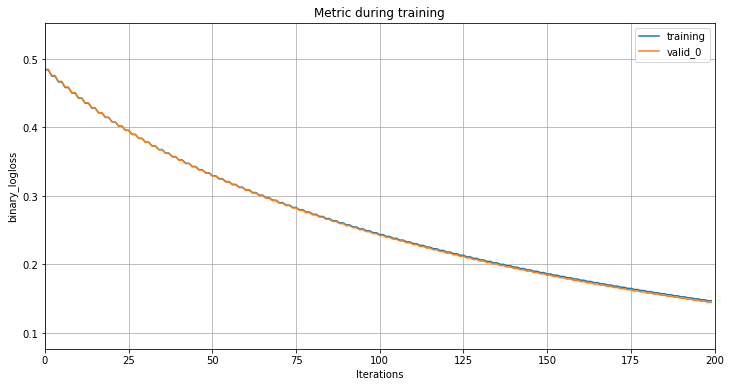

In [27]:
lgbm.plot_metric(model, figsize=(12,6))

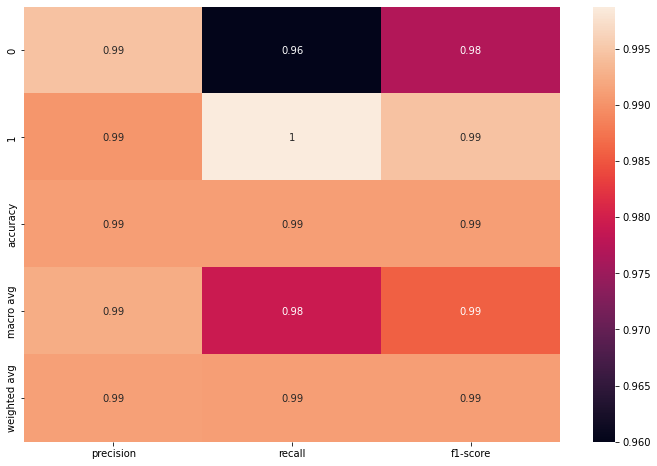

In [28]:
clf = classification_report(test_y, pred, output_dict=True, target_names=['0', '1'])
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, test_y)

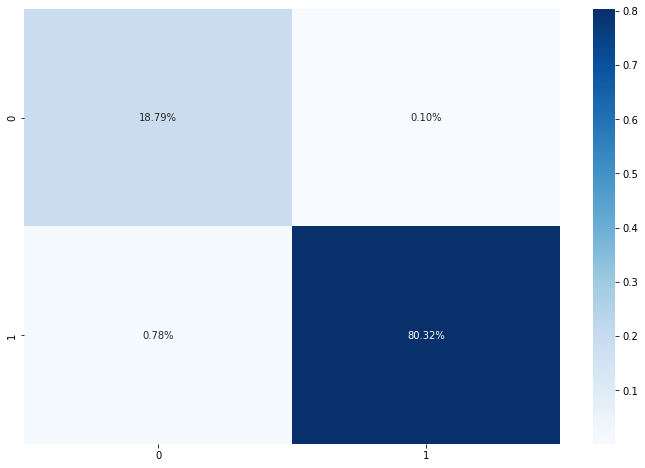

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [31]:
model.booster_.save_model(filename='loan_predict.txt')